<a href="https://colab.research.google.com/github/Aishwarya-ps-kumbla/MST_Aish_practice_problems_01/blob/main/Aishwarya_casestudy_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [424]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [425]:
#checking for missing values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [426]:
#There are no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [427]:
#all the attributes are int64 type, no need for encoding
x=data.copy()

In [428]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [429]:
# KMeans cluster
from sklearn.cluster import KMeans

In [430]:
#choosing number of clusters using within cluster sum of square

wcss=[]

In [431]:
for i in range (1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

In [432]:
wcss

[157595857524.96133,
 113217528878.79834,
 80333727007.11429,
 64855545845.90139,
 53016807332.875916,
 46759761376.76041,
 41696858697.51215,
 36168416257.31857,
 32774539383.9343,
 29986943344.621326]

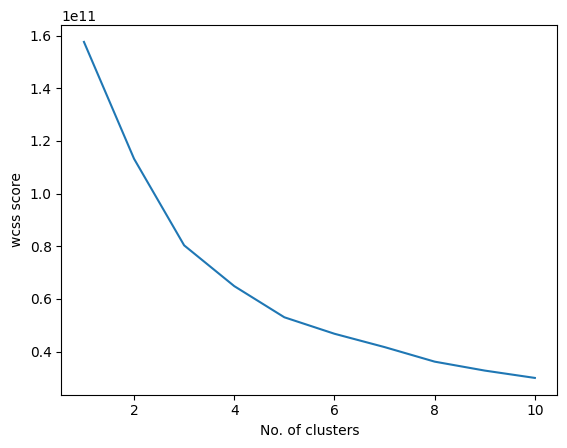

In [433]:
plt.plot(range(1,11),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('wcss score')
plt.show()

In [434]:
#from the above graph choose elbow point as 3
#fit no of clusters=3
km=KMeans(n_clusters=3,n_init=25)
km.fit(x)

KMeans(n_clusters=3, n_init=25)

In [435]:
cluster_labels=km.predict(x)

In [436]:
cluster_labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

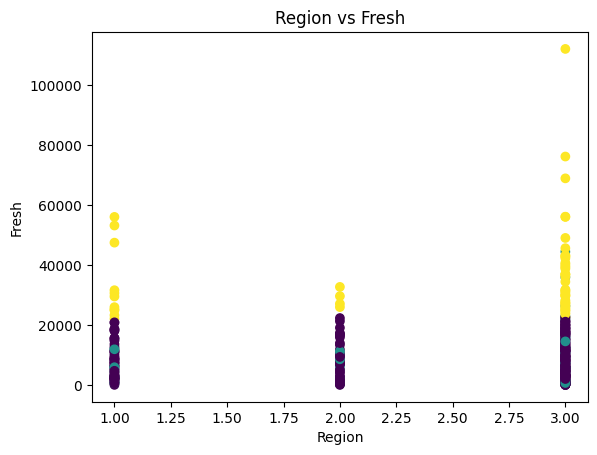

In [437]:
#studying features by plotting scatter plot
plt.scatter(x['Region'],x['Fresh'],c=cluster_labels)
plt.xlabel('Region')
plt.ylabel('Fresh')
plt.title('Region vs Fresh')
plt.show()

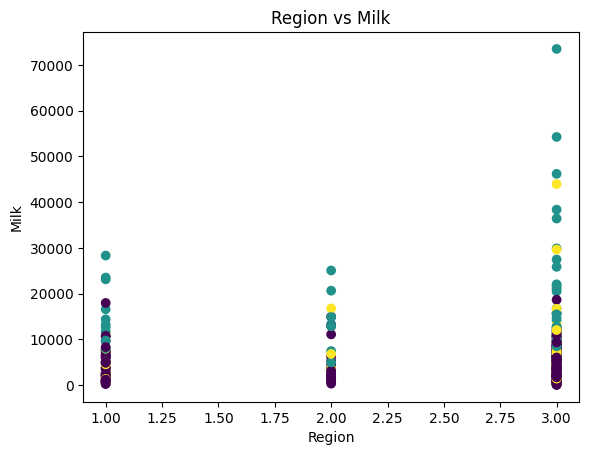

In [438]:
plt.scatter(x['Region'],x['Milk'],c=cluster_labels)
plt.xlabel('Region')
plt.ylabel('Milk')
plt.title('Region vs Milk')
plt.show()

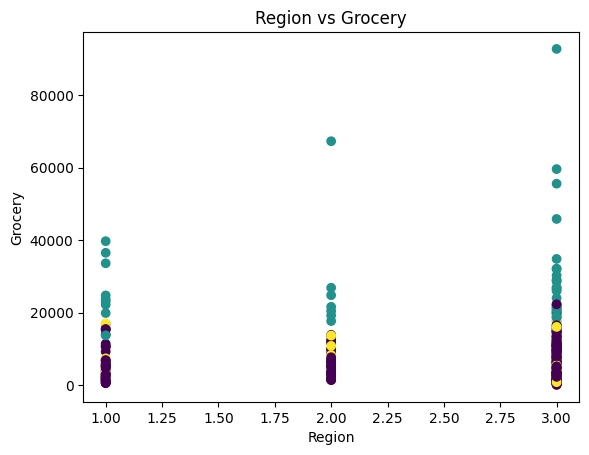

In [439]:
plt.scatter(x['Region'],x['Grocery'],c=cluster_labels)
plt.xlabel('Region')
plt.ylabel('Grocery')
plt.title('Region vs Grocery')
plt.show()

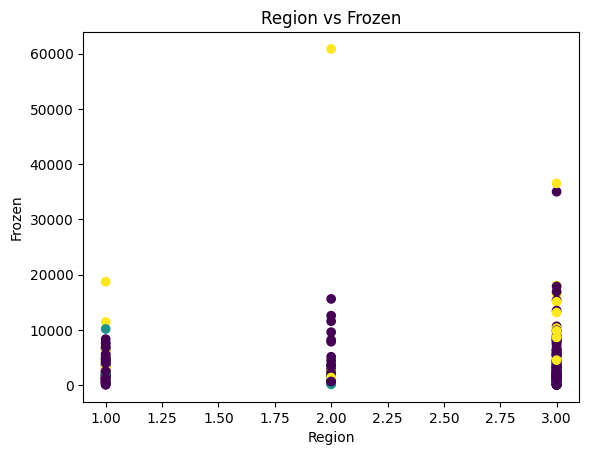

In [440]:
plt.scatter(x['Region'],x['Frozen'],c=cluster_labels)
plt.xlabel('Region')
plt.ylabel('Frozen')
plt.title('Region vs Frozen')
plt.show()

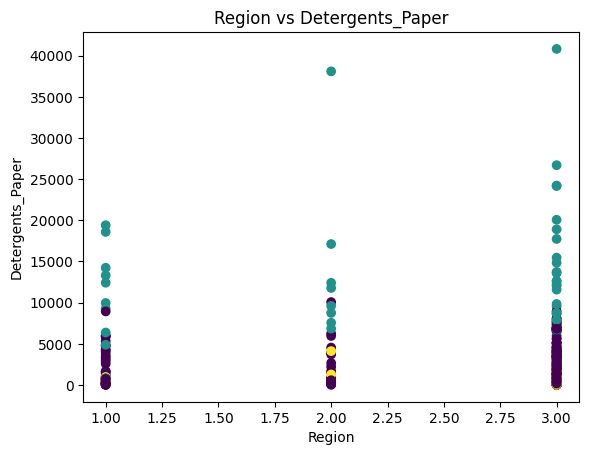

In [441]:
plt.scatter(x['Region'],x['Detergents_Paper'],c=cluster_labels)
plt.xlabel('Region')
plt.ylabel('Detergents_Paper')
plt.title('Region vs Detergents_Paper')
plt.show()

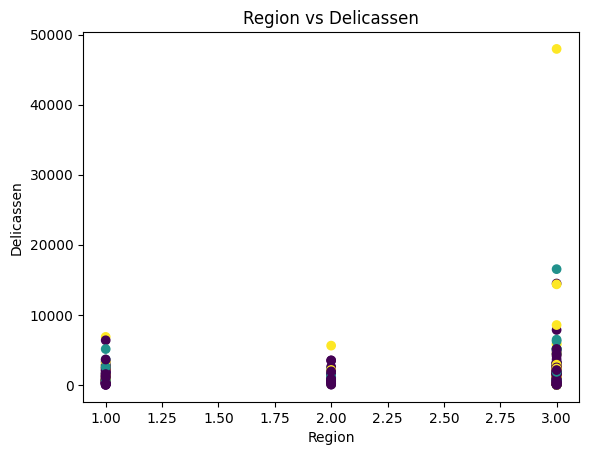

In [442]:
plt.scatter(x['Region'],x['Delicassen'],c=cluster_labels)
plt.xlabel('Region')
plt.ylabel('Delicassen')
plt.title('Region vs Delicassen')
plt.show()

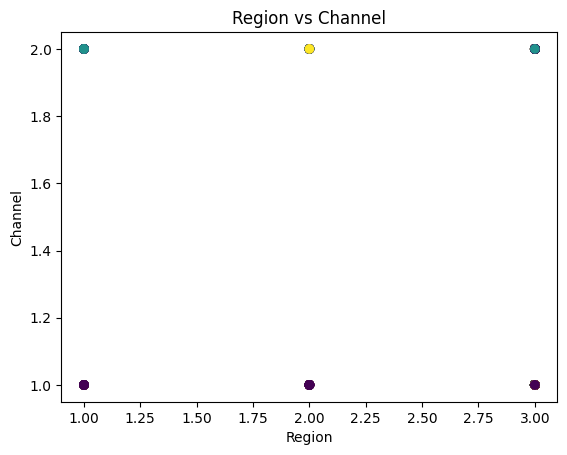

In [443]:
plt.scatter(x['Region'],x['Channel'],c=cluster_labels)
plt.xlabel('Region')
plt.ylabel('Channel')
plt.title('Region vs Channel')
plt.show()

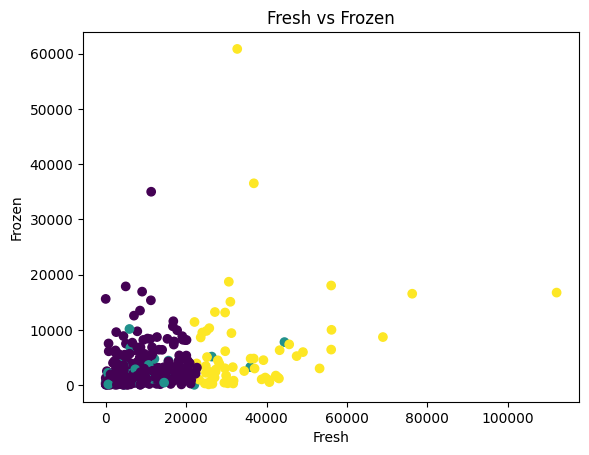

In [444]:
plt.scatter(x['Fresh'],x['Frozen'],c=cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen')
plt.show()

In [445]:
#Agglomerative HC clustering

In [446]:
from scipy.cluster import hierarchy
linkage = hierarchy.linkage
dendrogram = hierarchy.dendrogram
fcluster = hierarchy.fcluster

In [447]:
# to find distance of clusters
mergings=linkage(x,method='ward')

In [448]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

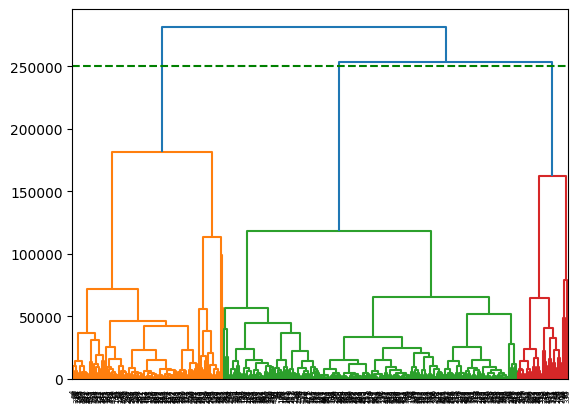

In [449]:
dendrogram(mergings)
plt.axhline(250000,color='green',linestyle='--')
plt.show()

In [450]:
from sklearn.cluster import AgglomerativeClustering

In [451]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model to the data
y_hc = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [452]:
y_hc

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,

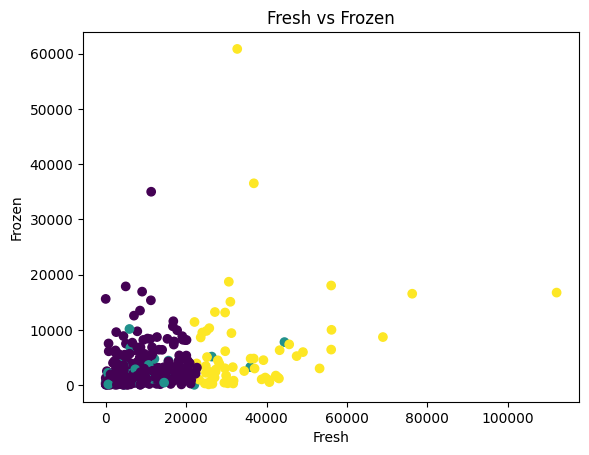

In [453]:
plt.scatter(x['Fresh'],x['Frozen'],c=cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.title('Fresh vs Frozen')
plt.show()

In [454]:
#DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [455]:
# Scale the data
sc = StandardScaler()
x_sc =scaler.fit_transform(x)

In [456]:
# Initialize DBSCAN with eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=10)

In [457]:
# Fit DBSCAN to the scaled data
dbscan.fit(x_sc)

DBSCAN(min_samples=10)

In [458]:
# Extract cluster labels
cluster_labels2 = dbscan.labels_

In [459]:
# Extracting the 'Fresh' and 'Frozen' columns from X_sc
fresh = x_sc[:, 0]
frozen = x_sc[:, 5]

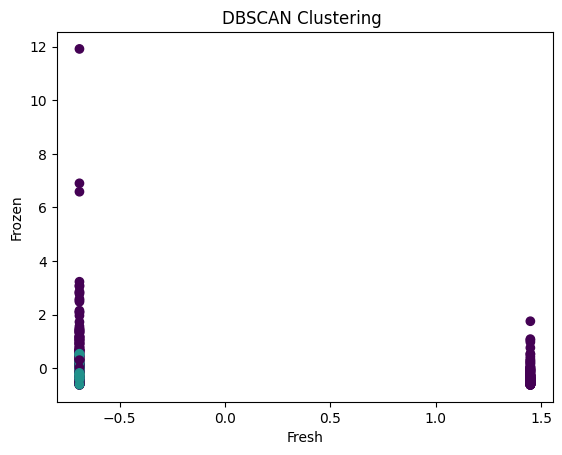

In [460]:
# Plotting the scatterplot
plt.scatter(fresh, frozen, c=cluster_labels2)
plt.title('DBSCAN Clustering ')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

In [461]:
# comparing the goodness of Kmeans cluster,Agglomerative HC and DBSCAN cluster by silhouette score

In [462]:
from sklearn.metrics import silhouette_score

In [463]:
#silhouette score of Kmeans clustering
silh_avg_kmeans=silhouette_score(x,cluster_labels)

In [464]:
print(silh_avg_kmeans)

0.4783511411368133


In [465]:
#silhouette score of Agglomerative H. clustering
silh_avg_hc=silhouette_score(x,y_hc)

In [466]:
print(silh_avg_hc)

0.3750155190004844


In [467]:
#silhouette score of DBSCAN clustering
silh_avg_dbsc=silhouette_score(x_sc,cluster_labels2)

In [468]:
print(silh_avg_dbsc)

0.01180537661552262


In [468]:
#comparing three clusterings, Kmeans clustering is better

In [469]:
#dimensionality reduction using PCA

data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


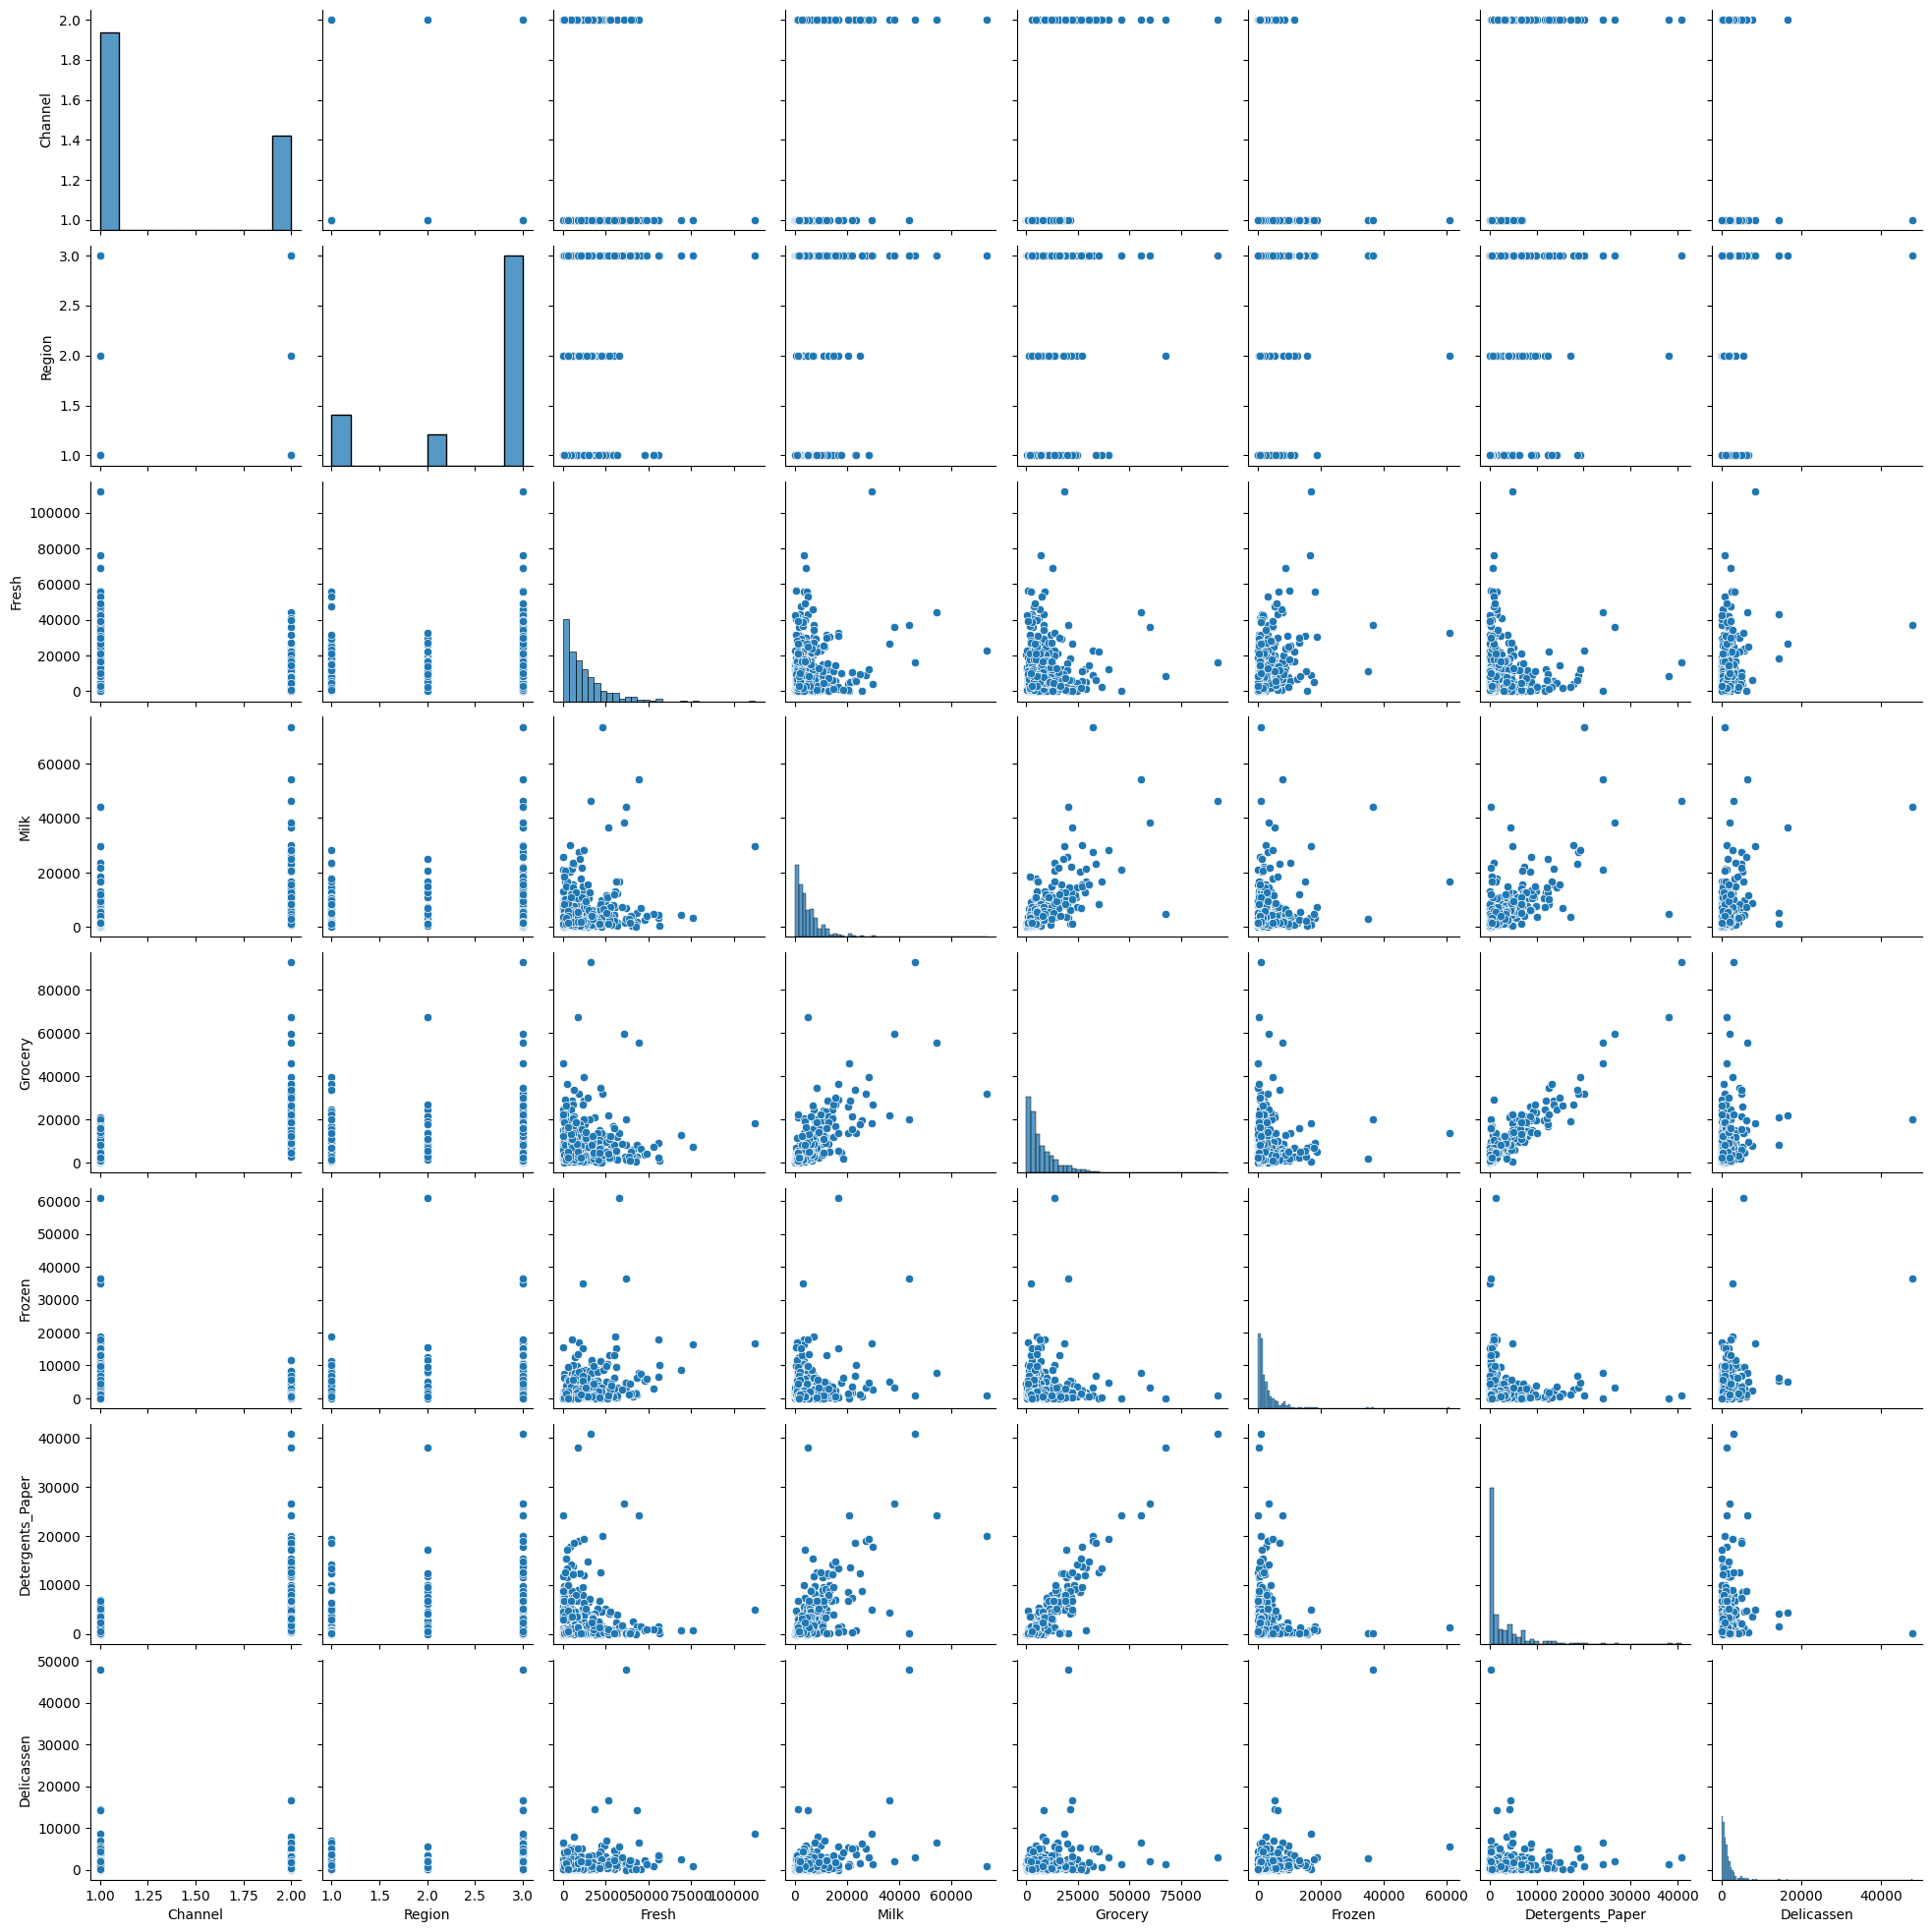

In [470]:
# creating pairplot
sns.pairplot(data)

In [471]:
data.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [472]:
data.var()

Channel             2.190723e-01
Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
dtype: float64

In [473]:
#scaling
from sklearn.preprocessing import scale

In [474]:
scale(data)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [475]:
#convert into dataframe
x = pd.DataFrame(scale(data),index = data.index,columns = data.columns)

In [476]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [477]:
from sklearn.decomposition import PCA

In [478]:
pc = PCA()

In [479]:
pc_array = pc.fit_transform(x)

In [480]:
pc_array.shape

(440, 8)

In [481]:
# here we have 8 components.can reduce it by
pc = PCA(n_components=4)

In [482]:
pc_array = pc.fit_transform(x)

In [483]:
pc_array.shape

(440, 4)

In [484]:
pc_data = pd.DataFrame(pc_array,columns = ["pc1","pc2","pc3","pc4"])

In [485]:
pc_data.head()

,pc1,pc2,pc3,pc4
0,0.843939,-0.515351,-0.767632,-0.044215
1,1.062676,-0.484601,-0.672975,0.401372
2,1.269141,0.682055,-0.664095,1.634953
3,-1.056782,0.610821,-0.505654,0.196005
4,0.634030,0.974199,-0.771209,0.186374


In [486]:
#correlation matrix
pc_data.corr().round()

,pc1,pc2,pc3,pc4
pc1,1.0,-0.0,0.0,0.0
pc2,-0.0,1.0,-0.0,0.0
pc3,0.0,-0.0,1.0,-0.0
pc4,0.0,0.0,-0.0,1.0


In [487]:
#from above, by correlation value=0, all components are inependent
#explained variance ratio of pca
pc.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173, 0.09229904])

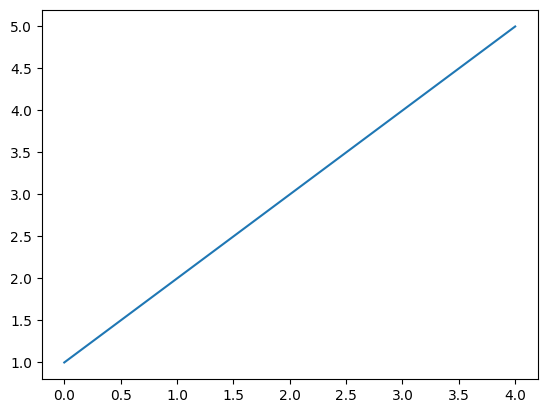

In [488]:
#plot the explained variance ratio of pca
plt.plot([1,2,3,4,5]),pc.explained_variance_ratio_
plt.show()

In [489]:
#it is purely linear